In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:

def plot_graph(G, pos=None, title="Graph", node_size=300, node_color='skyblue', with_labels=True):
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=with_labels, node_size=node_size, node_color=node_color, edge_color='gray', font_size=10)
    plt.title(title)
    plt.show()

def create_grid_graph(m, n):
    """ Create a grid graph and return its NetworkX graph and positions. """
    G = nx.grid_2d_graph(m, n)
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    return G, pos

def create_kagome_lattice(m, n):
    """ Create a Kagome lattice and return its NetworkX graph and positions. """
    G = nx.Graph()
    pos = {}
    
    def node_id(x, y, offset):
        return 2 * (x * n + y) + offset
    
    for x in range(m):
        for y in range(n):
            # Two nodes per cell (offset 0 and 1)
            current_id0 = node_id(x, y, 0)
            current_id1 = node_id(x, y, 1)
            pos[current_id0] = (y, -x)
            pos[current_id1] = (y + 0.5, -x + 0.5)
            
            # Add nodes
            G.add_node(current_id0)
            G.add_node(current_id1)
            
            # Right and down connections
            if y < n - 1:
                right_id0 = node_id(x, y + 1, 0)
                right_id1 = node_id(x, y + 1, 1)
                G.add_edge(current_id0, right_id0)
                G.add_edge(right_id1, right_id0)
                G.add_edge(right_id0, current_id0)
                G.add_edge(right_id0, right_id1)
                
            if x < m - 1:
                down_id0 = node_id(x + 1, y, 0)
                down_id1 = node_id(x + 1, y, 1)
                G.add_edge(current_id0, down_id0)
                G.add_edge(current_id1, down_id1)
                G.add_edge(down_id0, current_id0)
                G.add_edge(down_id1, current_id1)
            
            # Diagonal connections
            if x < m - 1 and y < n - 1:
                diag_id0 = node_id(x + 1, y + 1, 0)
                diag_id1 = node_id(x + 1, y + 1, 1)
                G.add_edge(current_id1, diag_id0)
                G.add_edge(diag_id0, current_id1)
                G.add_edge(current_id1, diag_id1)
                G.add_edge(diag_id1, current_id1)
    
    return G, pos


In [8]:
def create_square_grid(m, n):
    num_nodes = m * n
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    
    def node_id(x, y):
        return x * n + y
    
    for x in range(m):
        for y in range(n):
            current_id = node_id(x, y)
            
            # Right neighbor
            if y < n - 1:
                right_id = node_id(x, y + 1)
                adj_matrix[current_id, right_id] = 1
                adj_matrix[right_id, current_id] = 1
                
            # Down neighbor
            if x < m - 1:
                down_id = node_id(x + 1, y)
                adj_matrix[current_id, down_id] = 1
                adj_matrix[down_id, current_id] = 1

    # Generate positions for visualization
    pos = {(x * n + y): (y, -x) for x in range(m) for y in range(n)}

    # Create NetworkX graph from adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    
    return G, pos


In [9]:
# Example usage:
m, n = 4, 4  # 4 rows and 4 columns
adj_matrix = create_square_grid(m, n)

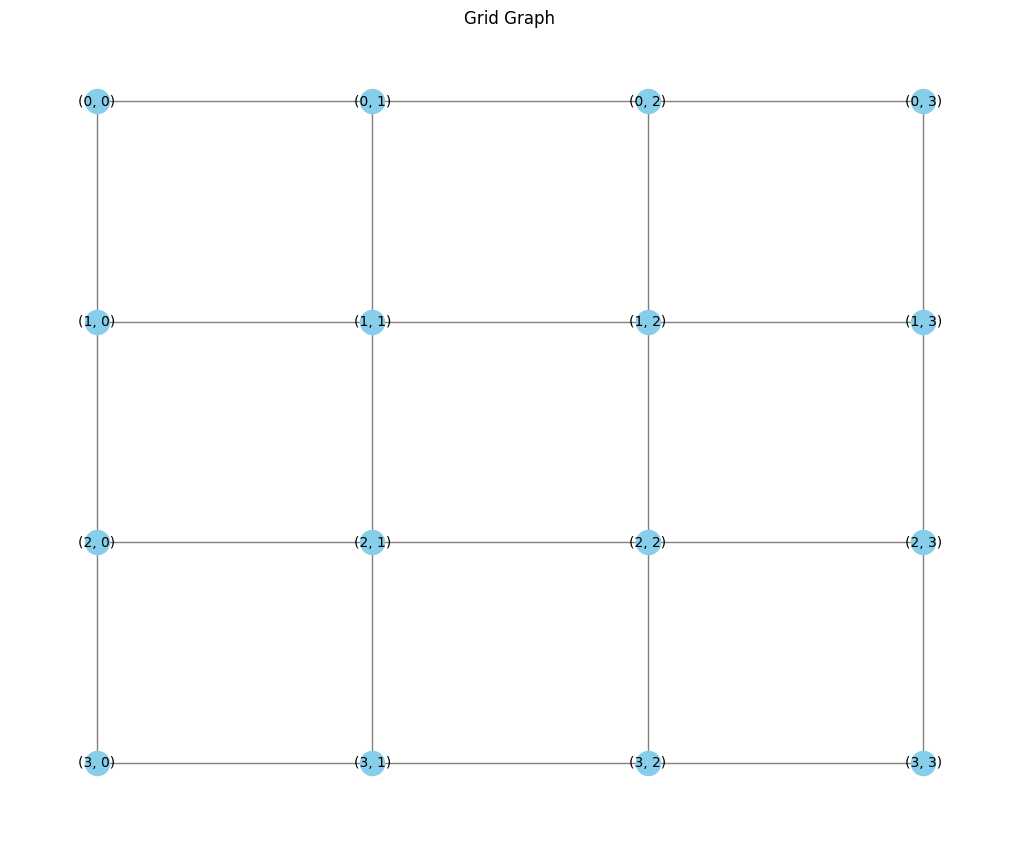

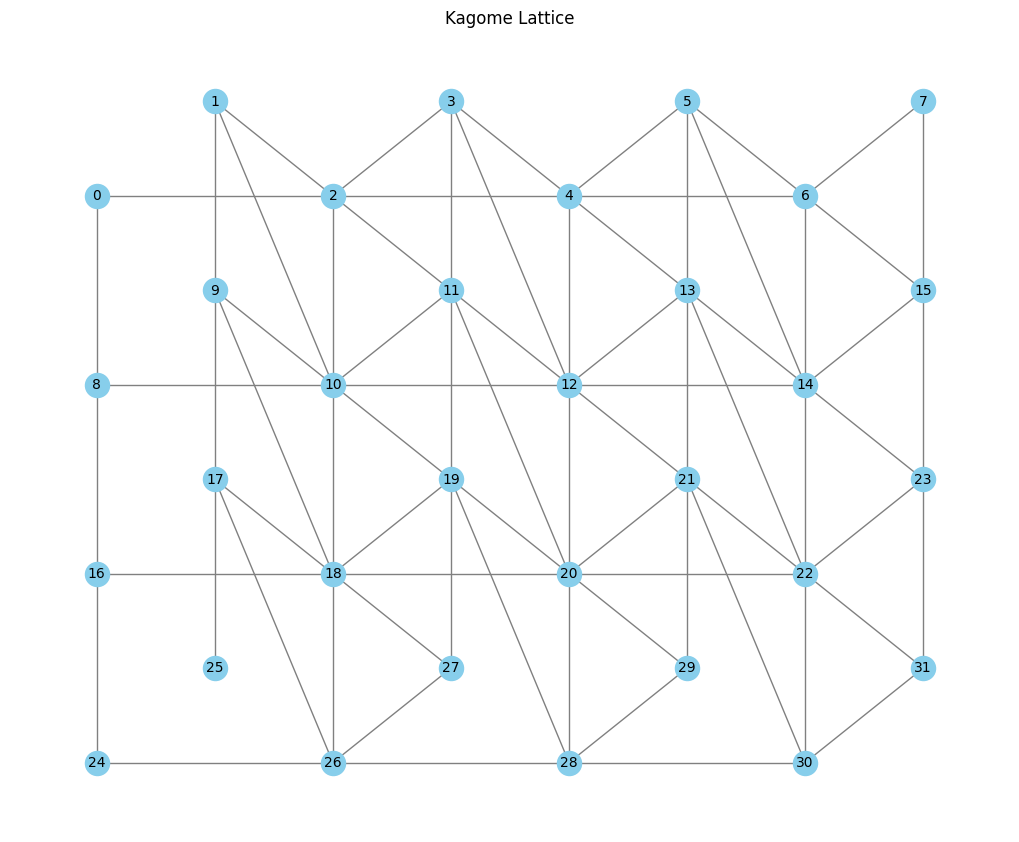

In [10]:

m, n = 4, 4  # Dimensions of the grid or lattice

# Create and visualize a grid graph
grid_graph, grid_pos = create_grid_graph(m, n)
plot_graph(grid_graph, pos=grid_pos, title="Grid Graph")

# Create and visualize a Kagome lattice
kagome_graph, kagome_pos = create_kagome_lattice(m, n)
plot_graph(kagome_graph, pos=kagome_pos, title="Kagome Lattice")


In [11]:
def create_square_grid(m, n):
    num_nodes = m * n
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    
    def node_id(x, y):
        return x * n + y
    
    for x in range(m):
        for y in range(n):
            current_id = node_id(x, y)
            
            # Right neighbor
            if y < n - 1:
                right_id = node_id(x, y + 1)
                adj_matrix[current_id, right_id] = 1
                adj_matrix[right_id, current_id] = 1
                
            # Down neighbor
            if x < m - 1:
                down_id = node_id(x + 1, y)
                adj_matrix[current_id, down_id] = 1
                adj_matrix[down_id, current_id] = 1

    # Generate positions for visualization
    pos = {(x * n + y): (y, -x) for x in range(m) for y in range(n)}

    # Create NetworkX graph from adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    
    return G, pos


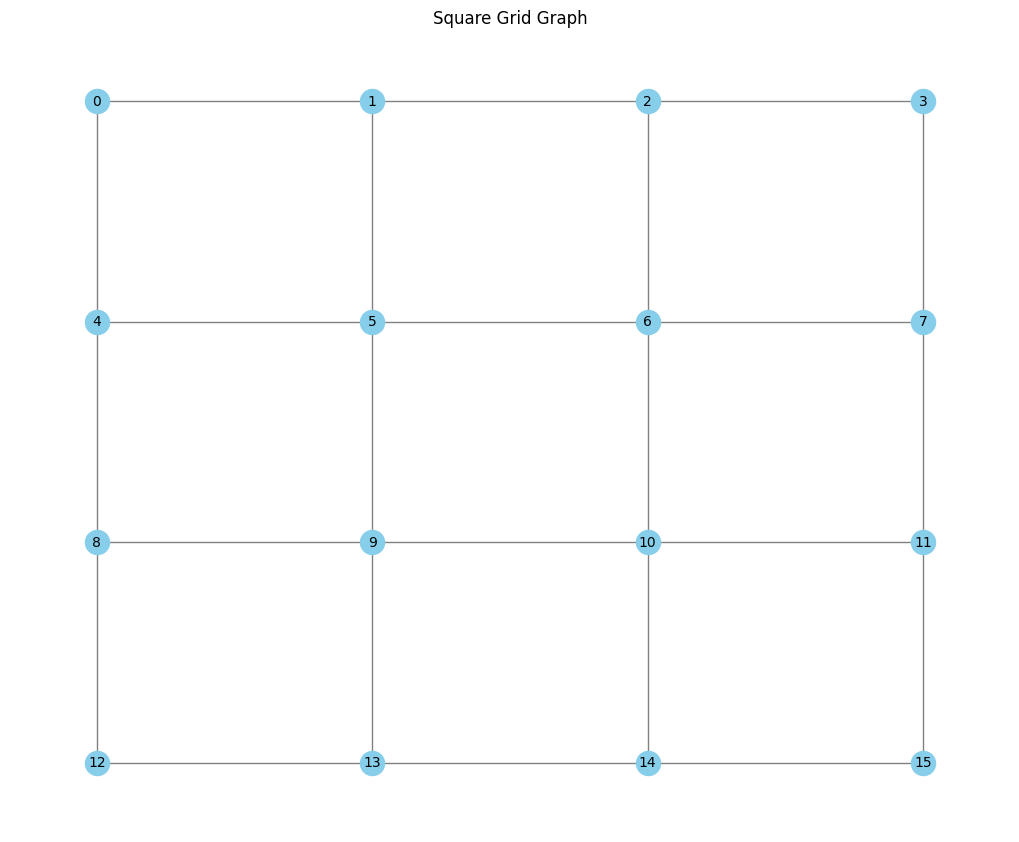

In [12]:
m, n = 4, 4  # Dimensions of the grid
G, pos = create_square_grid(m, n)
plot_graph(G, pos, title="Square Grid Graph")

In [14]:
def create_triangle_grid(m, n):
    num_nodes = m * n
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    
    def node_id(x, y):
        return x * n + y
    
    for x in range(m):
        for y in range(n):
            current_id = node_id(x, y)
            
            # Right neighbor
            if y < n - 1:
                right_id = node_id(x, y + 1)
                adj_matrix[current_id, right_id] = 1
                adj_matrix[right_id, current_id] = 1
                
            # Down neighbor (Hexagonal tiling)
            if x < m - 1:
                down_id = node_id(x + 1, y)
                adj_matrix[current_id, down_id] = 1
                adj_matrix[down_id, current_id] = 1
                
            # Diagonal neighbor (Hexagonal tiling)
            if x < m - 1 and y > 0 and (x + y) % 2 == 0:
                diag_id = node_id(x + 1, y - 1)
                adj_matrix[current_id, diag_id] = 1
                adj_matrix[diag_id, current_id] = 1
    
    # Generate positions for visualization
    pos = {}
    for x in range(m):
        for y in range(n):
            if (x + y) % 2 == 0:
                pos[node_id(x, y)] = (y * np.sqrt(3), x * 1.5)
            else:
                pos[node_id(x, y)] = (y * np.sqrt(3) + np.sqrt(3) / 2, x * 1.5 + 0.75)

    # Create NetworkX graph from adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    
    return G, pos

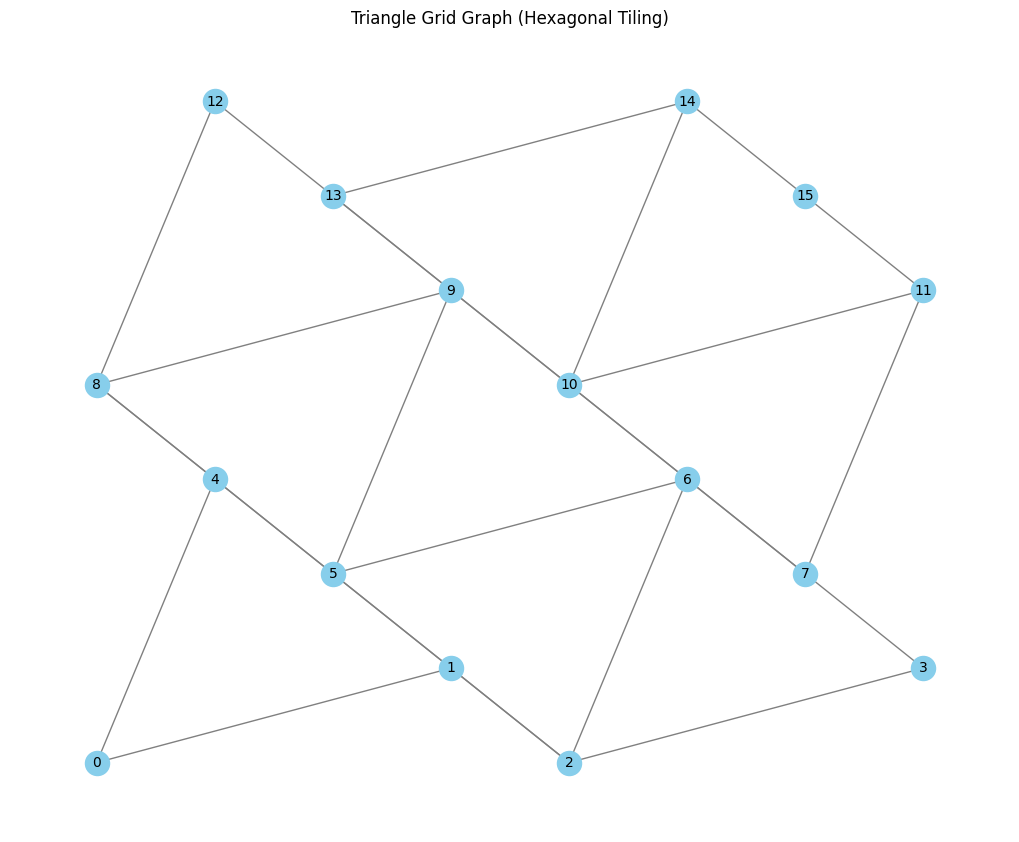

In [15]:
G, pos = create_triangle_grid(m, n)
plot_graph(G, pos, title="Triangle Grid Graph (Hexagonal Tiling)")

In [18]:
def create_hexagonal_grid(m, n):
    """
    Create a hexagonal grid graph with m rows and n columns.

    :param m: Number of rows
    :param n: Number of columns
    :return: NetworkX graph and node positions for visualization
    """
    G = nx.Graph()
    
    def add_hexagon(x, y):
        """ Add hexagon nodes and edges. """
        # Add nodes
        G.add_node((x, y))
        if y < n - 1:  # Right neighbor
            G.add_edge((x, y), (x, y + 1))
        if x < m - 1:  # Down neighbor
            G.add_edge((x, y), (x + 1, y))
        if x < m - 1 and y > 0 and (x + y) % 2 == 0:  # Diagonal neighbor
            G.add_edge((x, y), (x + 1, y - 1))
        if x < m - 1 and y < n - 1 and (x + y) % 2 == 1:  # Diagonal neighbor
            G.add_edge((x, y), (x + 1, y + 1))
    
    for x in range(m):
        for y in range(n):
            add_hexagon(x, y)

    # Generate positions for visualization
    pos = {}
    for x in range(m):
        for y in range(n):
            if (x + y) % 2 == 0:
                pos[(x, y)] = (y * 1.5, x * np.sqrt(3))
            else:
                pos[(x, y)] = (y * 1.5 + 0.75, x * np.sqrt(3) + np.sqrt(3) / 2)

    return G, pos


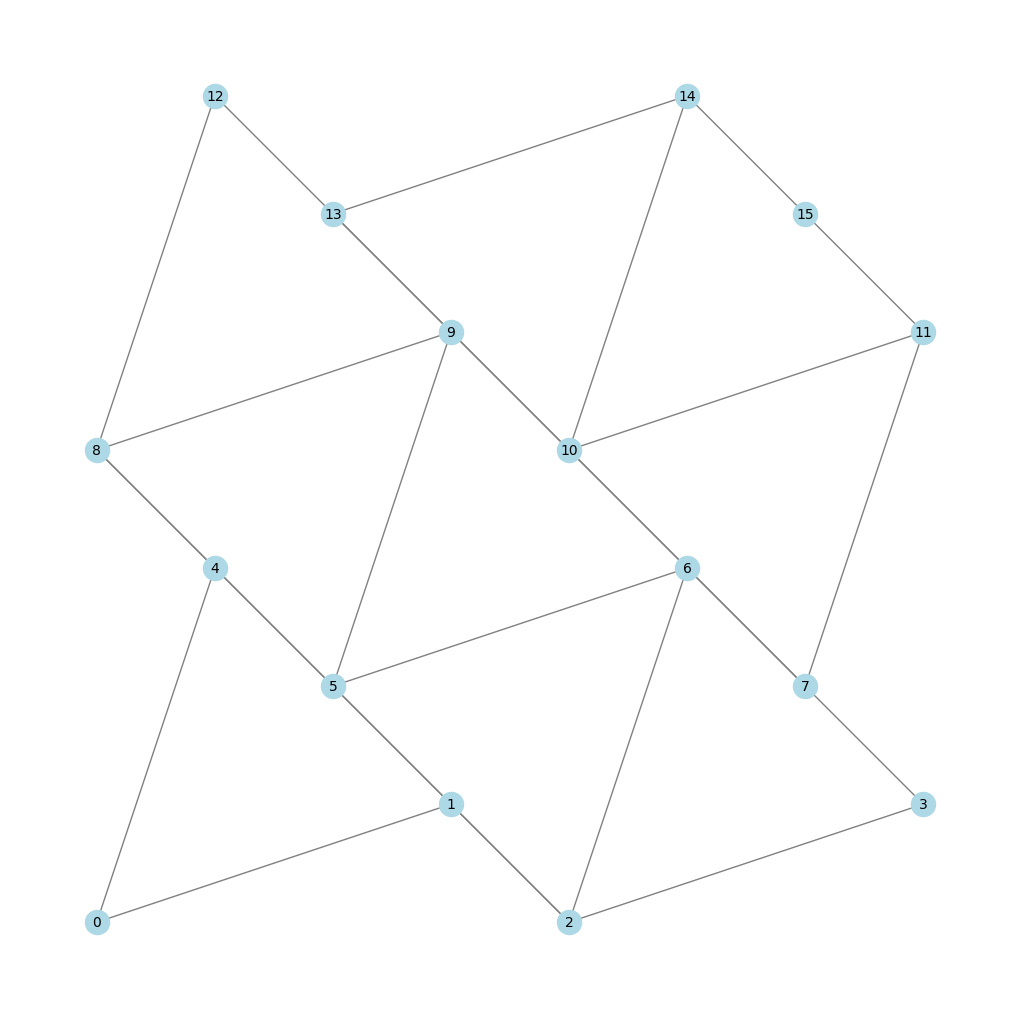

In [19]:
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10)
plt.show()

In [21]:

def create_and_plot_hexagonal_lattice(rows, cols):
    """
    Create and plot a hexagonal lattice graph with given rows and columns.

    :param rows: Number of rows in the hexagonal grid
    :param cols: Number of columns in the hexagonal grid
    """
    # Create a hexagonal lattice graph
    G = nx.hexagonal_lattice_graph(rows, cols)

    # Generate positions for visualization
    pos = nx.get_node_attributes(G, 'pos')
    if pos is None:
        pos = nx.spring_layout(G, seed=42)  # Fallback layout if 'pos' not available

    # Plot the hexagonal lattice graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10)
    plt.title(f"Hexagonal Lattice Graph ({rows}x{cols})")
    plt.show()

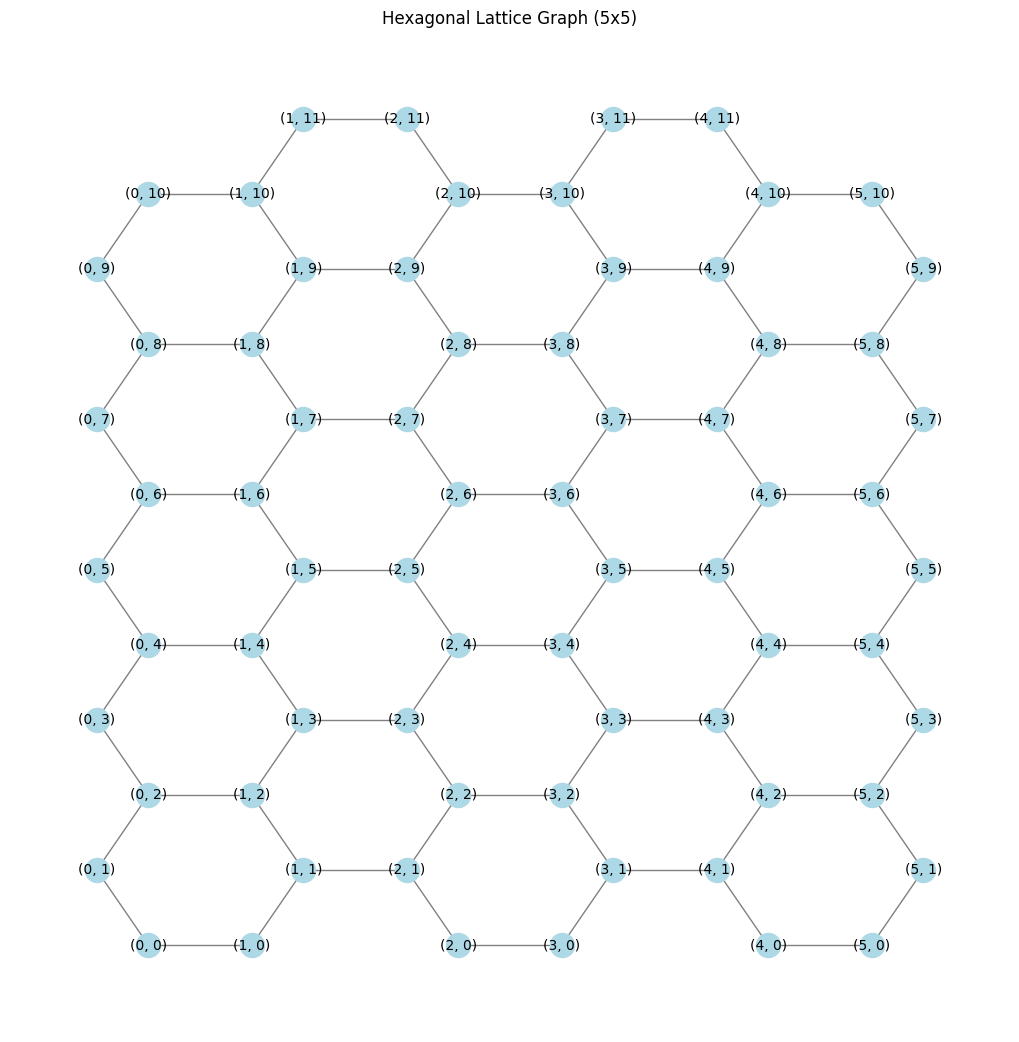

In [22]:
rows, cols = 5, 5  # Dimensions of the grid
create_and_plot_hexagonal_lattice(rows, cols)